## Using Simple RNN To Perform Sentimental analysis on Congress DataSet

In [15]:
### RNN 


import pandas as pd
import numpy
from keras.models import Sequential
from keras.preprocessing.text import one_hot
import keras.preprocessing.sequence as sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Flatten,SimpleRNN
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, metrics



In [16]:
#from string import maketrans

#reading the dataset
datanew = pd.read_csv(r"C:\Users\vidya\Downloads\Congress_DataSet.csv", delimiter=',',header=None)

#Splitting the labels and text content
X = datanew[1]
Y = datanew[0]

#Encoding the labels to integers
encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)



max_features = 10000  # number of words to consider as features
maxlen = 32 # max len of document

#Encoding the text content for each document for the given max features through one-hot encoding technique
encoded_docs = [one_hot(d,max_features) for d in X]

#Padding the encoded data to sequences of length maxlen
input_train = sequence.pad_sequences(encoded_docs, maxlen= maxlen, padding='post')


input_length=maxlen


#Creating a sequential model
#Adding a embedded layer with input as  one hot encoded vectors of length input_length.
#Adding a layer of SimpleRNN
#Adding a final layer with sigmoid as the activation function 

model = Sequential()

# vocabulary=max_features, output_dim=8, input_dim=input_length
model.add(Embedding(max_features,8,input_length=input_length))


model.add(SimpleRNN(8))

model.add(Dense(1, activation='sigmoid'))


#  compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


history= model.fit(input_train,y_data,epochs=50,batch_size=128,validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)

print('Accuracy : %f' %(accuracy*100))



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 32, 8)             80000     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 80,145
Trainable params: 80,145
Non-trainable params: 0
_________________________________________________________________
None


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2342 samples, validate on 586 samples
Epoch 1/50
2342/2342 [==============================] - 1s 416us/step - loss: 0.6894 - acc: 0.5448 - val_loss: 0.6847 - val_acc: 0.5580
Epoch 2/50
2342/2342 [==============================] - 0s 208us/step - loss: 0.6515 - acc: 0.6605 - val_loss: 0.6819 - val_acc: 0.5512
Epoch 3/50
2342/2342 [==============================] - 1s 261us/step - loss: 0.5681 - acc: 0.8066 - val_loss: 0.6660 - val_acc: 0.5904
Epoch 4/50
2342/2342 [==============================] - 1s 293us/step - loss: 0.4326 - acc: 0.8928 - val_loss: 0.6643 - val_acc: 0.5853
Epoch 5/50
2342/2342 [==============================] - 1s 296us/step - loss: 0.3178 - acc: 0.9518 - val_loss: 0.6799 - val_acc: 0.5785
Epoch 6/50
2342/2342 [==============================] - 1s 292us/step - loss: 0.2409 - acc: 0.9752 - val_loss: 0.6870 - val_acc: 0.5887
Epoch 7/50
2342/2342 [==============================] - 1s 289us/step - loss: 0.1870 - acc: 0.9868 - val_loss: 0.7052 - val_acc: 0.5853
E

## Plotting the Results

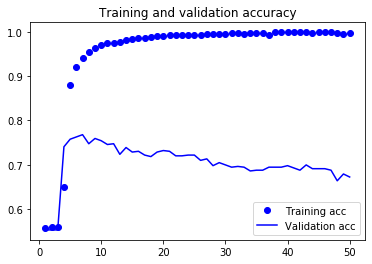

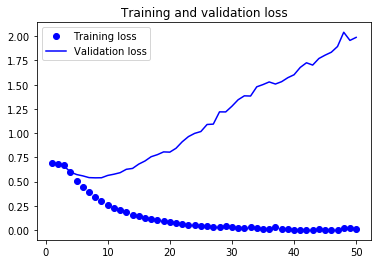

In [21]:
### Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Model building using LSTM

In [18]:
### LSTM


import pandas as pd
import numpy
from keras.models import Sequential
from keras.preprocessing.text import one_hot
import keras.preprocessing.sequence as sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Flatten,SimpleRNN
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.layers import LSTM



In [19]:
#from string import maketrans

#reading the dataset
datanew = pd.read_csv(r"C:\Users\vidya\Downloads\Congress_DataSet.csv", delimiter=',',header=None)

#Splitting the labels and text content
X = datanew[1]
Y = datanew[0]

#Encoding the labels to integers
encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)

max_features = 10000
maxlen = 32 # max len of document

#Encoding the text content for each document for the given max features through one-hot encoding technique
encoded_docs = [one_hot(d,max_features) for d in X]

#Padding the encoded data to sequences of length maxlen
input_train = sequence.pad_sequences(encoded_docs, maxlen= maxlen, padding='post')


input_length=maxlen


#Creating a sequential model
#Adding a embedded layer with input as  one hot encoded vectors of length input_length.
#Adding a layer of SimpleRNN
#Adding a final layer with sigmoid as the activation function 

model = Sequential()

# vocabulary=max_features, output_dim=8, input_dim=input_length
model.add(Embedding(max_features,8,input_length=input_length))


model.add(LSTM(8))

model.add(Dense(1, activation='sigmoid'))


#  compile the keras model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
print(model.summary())


history= model.fit(input_train,y_data,epochs=50,batch_size=128,validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)

print('Accuracy : %f' %(accuracy*100))



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 32, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 80,553
Trainable params: 80,553
Non-trainable params: 0
_________________________________________________________________
None


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2342 samples, validate on 586 samples
Epoch 1/50
2342/2342 [==============================] - 1s 612us/step - loss: 0.6911 - acc: 0.5568 - val_loss: 0.6886 - val_acc: 0.5529
Epoch 2/50
2342/2342 [==============================] - 1s 329us/step - loss: 0.6837 - acc: 0.5594 - val_loss: 0.6827 - val_acc: 0.5529
Epoch 3/50
2342/2342 [==============================] - 1s 320us/step - loss: 0.6666 - acc: 0.5594 - val_loss: 0.6592 - val_acc: 0.5529
Epoch 4/50
2342/2342 [==============================] - 1s 316us/step - loss: 0.5979 - acc: 0.6490 - val_loss: 0.6000 - val_acc: 0.7406
Epoch 5/50
2342/2342 [==============================] - 1s 316us/step - loss: 0.5088 - acc: 0.8792 - val_loss: 0.5732 - val_acc: 0.7577
Epoch 6/50
2342/2342 [==============================] - 1s 309us/step - loss: 0.4434 - acc: 0.9210 - val_loss: 0.5595 - val_acc: 0.7628
Epoch 7/50
2342/2342 [==============================] - 1s 339us/step - loss: 0.3905 - acc: 0.9415 - val_loss: 0.5416 - val_acc: 0.7679
E

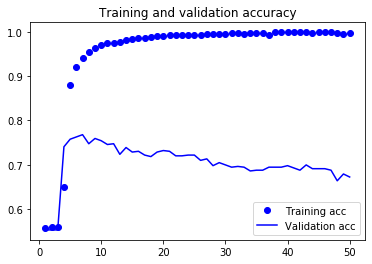

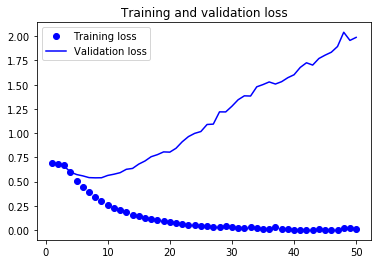

In [20]:
### Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Using Simple RNN with additional layers and Relu as activation function 

In [3]:
#from string import maketrans

#reading the dataset
datanew = pd.read_csv(r"C:\Users\vidya\Downloads\Congress_DataSet.csv", delimiter=',',header=None)

#Splitting the labels and text content
X = datanew[1]
Y = datanew[0]

#Encoding the labels to integers
encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128


# LSTM
output_size = 70

input_length=maxlen




#max_features = 10000  # number of words to consider as features
#maxlen = 32 # max len of document

#Encoding the text content for each document for the given max features through one-hot encoding technique
encoded_docs = [one_hot(d,max_features) for d in X]

#Padding the encoded data to sequences of length maxlen
input_train = sequence.pad_sequences(encoded_docs, maxlen= maxlen, padding='post')


input_length=maxlen


#Creating a sequential model
#Adding a embedded layer with input as  one hot encoded vectors of length input_length.
#Adding a layer of SimpleRNN
#Adding a final layer with sigmoid as the activation function 

model = Sequential()

# vocabulary=max_features, output_dim=8, input_dim=input_length
model.add(Embedding(max_features,8,input_length=input_length))


model.add(SimpleRNN(output_size))

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(1, activation='sigmoid'))


#  compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


history= model.fit(input_train,y_data,epochs=50,batch_size=128,validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)

print('Accuracy : %f' %(accuracy*100))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 70)                5530      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 355       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 165,951
Trainable params: 165,951
Non-trainable params: 0
________________________________________________

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2342 samples, validate on 586 samples
Epoch 1/50
2342/2342 [==============================] - 2s 960us/step - loss: 0.6879 - acc: 0.5589 - val_loss: 0.6892 - val_acc: 0.5529
Epoch 2/50
2342/2342 [==============================] - 1s 602us/step - loss: 0.6880 - acc: 0.5594 - val_loss: 0.6874 - val_acc: 0.5529
Epoch 3/50
2342/2342 [==============================] - 2s 768us/step - loss: 0.6876 - acc: 0.5427 - val_loss: 0.6926 - val_acc: 0.5512
Epoch 4/50
2342/2342 [==============================] - 2s 795us/step - loss: 0.6869 - acc: 0.5555 - val_loss: 0.6886 - val_acc: 0.5205
Epoch 5/50
2342/2342 [==============================] - 1s 638us/step - loss: 0.6803 - acc: 0.5769 - val_loss: 0.6881 - val_acc: 0.5546
Epoch 6/50
2342/2342 [==============================] - 2s 646us/step - loss: 0.6813 - acc: 0.5751 - val_loss: 0.6860 - val_acc: 0.5563
Epoch 7/50
2342/2342 [==============================] - 2s 769us/step - loss: 0.6827 - acc: 0.5730 - val_loss: 0.6860 - val_acc: 0.5563
E

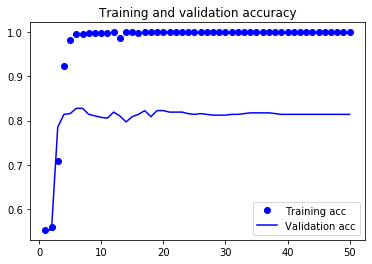

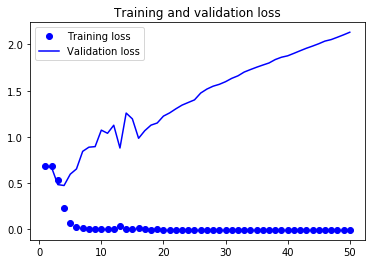

In [9]:
### Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
